原始数据：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


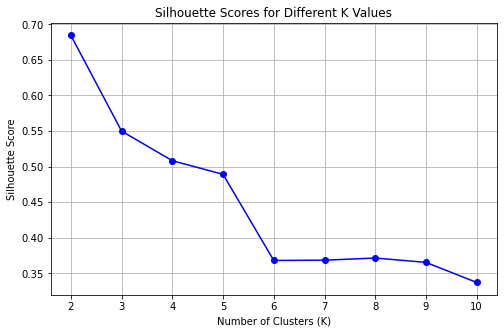

最佳的K值为：2

聚类结果：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
数据集前5行：
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87          

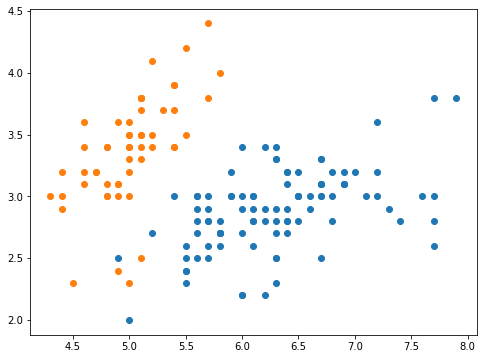

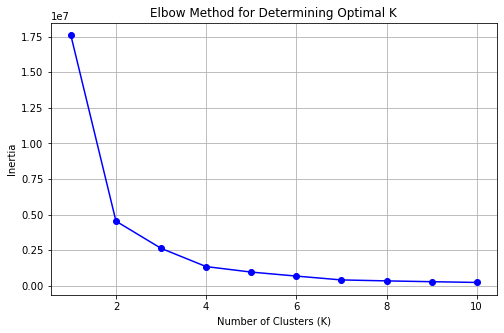

全部数据预览：
    国家与地区  Per capita GDP  urban（%）  Aging（%）
0     阿富汗         1925.17     26.70      2.47
1      中国        14246.86     55.61      9.68
2    中国香港        56923.49    100.00     15.06
3      印度         6104.58     32.75      5.62
4   印度尼西亚        11057.56     53.74      5.17
5     以色列        36575.94     92.14     11.24
6      日本        40763.40     93.50     26.34
7      老挝         5691.26     38.61      3.81
8    中国澳门       111496.60    100.00      8.99
9    马来西亚        26950.34     74.71      5.89
10    菲律宾         7387.32     44.37      4.58
11  沙特阿拉伯        53538.79     83.13      2.86
12    新加坡        85382.30    100.00     11.68
13     韩国        34647.07     82.47     13.13
14     泰国        16340.03     50.37     10.47
标准化后的完整数据：
    Per capita GDP  urban（%）  Aging（%）
0        -1.040356 -1.635072 -1.119190
1        -0.639892 -0.505294  0.091941
2         0.747131  1.229431  0.995669
3        -0.904522 -1.398643 -0.590055
4        -0.743546 -0.578372 -0.665646
5         0

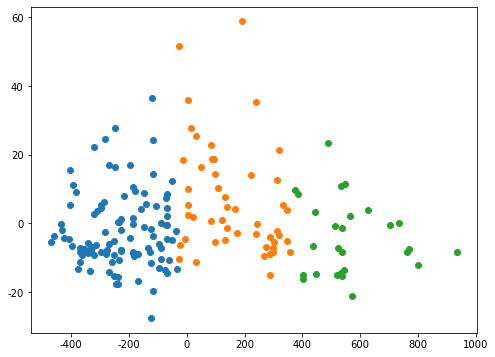

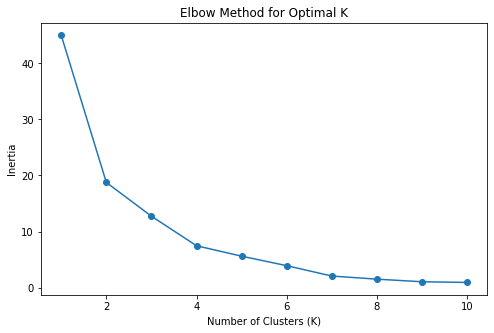

聚类后的完整数据：
    国家与地区  Per capita GDP  urban（%）  Aging（%）  Cluster
0     阿富汗         1925.17     26.70      2.47        1
1      中国        14246.86     55.61      9.68        1
2    中国香港        56923.49    100.00     15.06        0
3      印度         6104.58     32.75      5.62        1
4   印度尼西亚        11057.56     53.74      5.17        1
5     以色列        36575.94     92.14     11.24        0
6      日本        40763.40     93.50     26.34        2
7      老挝         5691.26     38.61      3.81        1
8    中国澳门       111496.60    100.00      8.99        0
9    马来西亚        26950.34     74.71      5.89        0
10    菲律宾         7387.32     44.37      4.58        1
11  沙特阿拉伯        53538.79     83.13      2.86        0
12    新加坡        85382.30    100.00     11.68        0
13     韩国        34647.07     82.47     13.13        0
14     泰国        16340.03     50.37     10.47        1


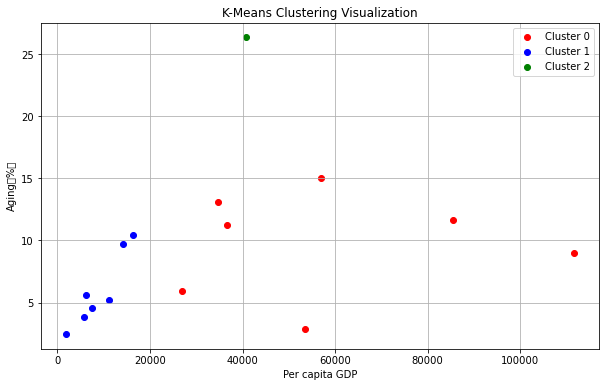

In [13]:
# 忽略全局警告
import warnings
warnings.filterwarnings("ignore")
# 设置显示负号
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
##导入调用所需的库
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris##加载鸢尾花数据集
data = load_iris()
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
##显示完整数据
print("原始数据：")
print(iris_data.head())
##轮廓系数法确定最佳K值
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(iris_data.iloc[:, :-1])  
    silhouette_avg = silhouette_score(iris_data.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)
##绘制轮廓系数随K值变化的折线图
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()
##输出最佳K值
best_k = k_values[np.argmax(silhouette_scores)]
print(f"最佳的K值为：{best_k}")
##基于最佳K值进行K-均值聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
iris_data['Cluster'] = kmeans.fit_predict(iris_data.iloc[:, :-1])
##显示聚类结果
print("\n聚类结果：")
print(iris_data.head())##可视化聚类结果（以第1和第2个特征为例）
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_data = iris_data[iris_data['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')##导入必要的库
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA##加载葡萄酒数据集
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
##查看数据集信息
print("数据集前5行：")
print(wine_data.head())##使用肘部法则确定最佳K值
inertia_values = []  ##存储不同K值下的惯性
k_values = range(1, 11)  ##设置K值范围
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_data)
    inertia_values.append(kmeans.inertia_)
##绘制肘部法则图
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Determining Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()##基于PCA降维到2D
pca = PCA(n_components=2)
wine_data_2d = pca.fit_transform(wine_data)
##基于最佳K值进行K-means聚类（本次实验选取最佳K值为3，可通过图形手动选择最佳K值）
best_k = 3  ##请根据肘部法则图手动调整
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(wine_data_2d)##可视化聚类结果
plt.figure(figsize=(8, 6))
for cluster in range(best_k):
    cluster_data = wine_data_2d[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')##导入调用所需的库
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt##读取 Excel 文件
file_path = r"D:\教材编写所有资料\教材编写组 数据集\第九章-实验二数据.xlsx"  ##文件路径
data = pd.read_excel(file_path)
##查看数据
print("全部数据预览：")
print(data)##假设选择数据的某几列进行聚类
columns_for_clustering = ['Per capita GDP','urban（%）','Aging（%）'] 
cluster_data = data[columns_for_clustering].dropna() 
##在进行聚类之前，先对数据进行标准化，使各变量的范围相同，以确保所有特征对模型的影响是等同的。
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
##将标准化数据转换为DataFrame，方便查看
scaled_data_df = pd.DataFrame(scaled_data, columns=['Per capita GDP','urban（%）','Aging（%）'])
##输出标准化后的完整数据
print("标准化后的完整数据：")
print(scaled_data_df)
##使用K-means算法对标准化后的数据进行聚类，首先我们需要确定合适的聚类数量。
##使用肘部法则，图中出现“肘部”位置时，对应的K值就是合适的聚类数量。
inertia = []
k_values = range(1, 11) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
##绘制肘部法曲线
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()
##从肘部图上选择了最佳的K值为3，接下来进行K-均值聚类：
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
##将聚类结果添加到原始数据
data['Cluster'] = cluster_labels
print("聚类后的完整数据：")
print(data)
##可视化聚类结果
##使用散点图展示每个聚类的分布状况
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluster in range(optimal_k):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_points['Per capita GDP'],
        cluster_points['Aging（%）'],
        label=f'Cluster {cluster}',
        color=colors[cluster]
    )
plt.title('K-Means Clustering Visualization')
plt.xlabel('Per capita GDP')
plt.ylabel('Aging（%）')
plt.legend()
plt.grid()
plt.show()
